In [ ]:
# Setting env
%env TMP_DIR=/home/ubuntu/tmp
%env AWS_REGION=us-west-2
%env AWS_NO_SIGN_REQUEST=YES
%env GDAL_DISABLE_READDIR_ON_OPEN=EMPTY_DIR
%env EDK_MAX_WORKERS=8
# %env CPL_DEBUG=TRUE

In [2]:
import earth_data_kit as edk
import datetime
import os
from data.country_bounding_boxes import country_bounding_boxes

In [ ]:
edk

In [ ]:
edk.__version__

In [5]:
# Initialize the modis dataset using the S3 engine.
source = "s3://modis-pds/MCD43A4.006/{h}/{v}/%Y%j/*_B0?.TIF"
dataset_id = "modis-pds"
engine = "s3"

ds = edk.stitching.Dataset(dataset_id, source, engine, clean=True)

In [ ]:
print (ds)

In [7]:
# Set the temporal bounds for the dataset (e.g., using January 2017 as an example)
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2017, 1, 7)
ds.set_timebounds(start_date, end_date)

In [8]:
# Setting spatial bounds for the dataset

# Specify the grid file that maps the dataset's grid system to world coordinates (e.g., a KML file)
grid_fp = os.path.join(os.getcwd(), "data", "modis.kml")

# AL stands for Albania, you can change it to any other country. Eg: IN for India
bbox = country_bounding_boxes['AL'][1]

# Define a function to extract grid components (horizontal 'h' and vertical 'v') from a grid file row.
def extract_grid_components(row):
    import re
    match = re.search(r"h:(\d+)\s+v:(\d+)", row.Name)
    if match:
        return {"h": f"{int(match.group(1)):02d}", "v": f"{int(match.group(2)):02d}"}
    return {}

ds.set_spacebounds(bbox, grid_fp, extract_grid_components)

In [ ]:
print (ds)

In [ ]:
# Running discover to get the bands available in the dataset, you can also set gdal options if needed
# ds.set_gdal_options(["-srcnodata 32767"])
ds.discover()

In [ ]:
# Get the bands discovered in the dataset
ds.get_bands()

In [12]:
# Stitches the scene files into VRTs using the defined band arrangement.
ds.to_vrts(bands=["Nadir_Reflectance_Band3", "Nadir_Reflectance_Band4"])

In [13]:
ds = edk.stitching.Dataset.from_file("/Users/siddhantgupta3/Desktop/Work/project-planet-bench/repos/private/edk/edk-tmp/tmp/modis-pds-albania/modis-pds-albania.json")

In [14]:
# This returns a dataarray with the stitched bands
da = ds.to_dataarray()

In [ ]:
da


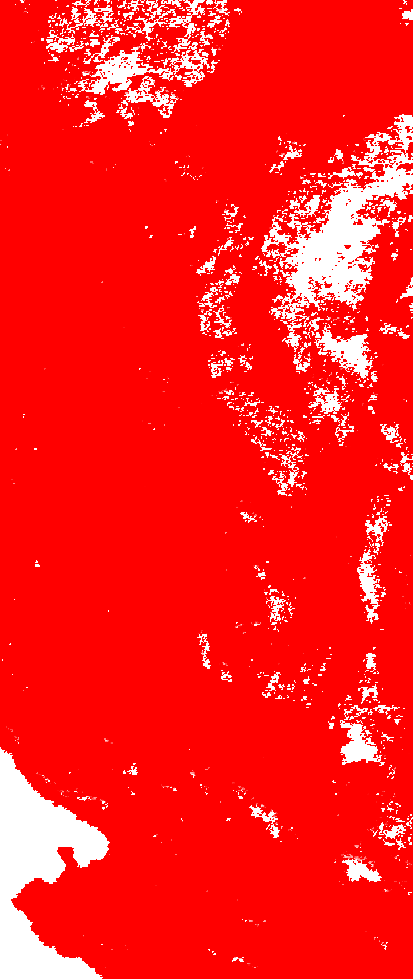

In [17]:
da.sel(time='2017-01-01', band=1).edk.plot()